(HW5)=
# HW5


## Task 5.1 (1.5 points)

For a one-dimensional gaussian $\xi \sim \mathcal N(\mu, \sigma^2)$ there are well-known rules of one, two and three sigmas:

* one-sigma rule: $\mathbb P(\vert \xi - \mu \vert \leqslant \sigma) = \Phi(1) - \Phi(-1) \approx 0.6827$ 
* two-sigma rule: $\mathbb P(\vert \xi - \mu \vert \leqslant 2\sigma) = \Phi(2) - \Phi(-2) \approx 0.9545$ 
* three-sigma rule: $\mathbb P(\vert \xi - \mu \vert \leqslant 3\sigma) = \Phi(3) - \Phi(-3) \approx 0.9973$ 

![Gaussian Distribution](https://news.mit.edu/sites/default/files/styles/news_article__image_gallery/public/images/201202/20120208160239-1_0.jpg?itok=1X1a_HCs)


In [ ]:
from scipy.stats import norm

norm.cdf(1) - norm.cdf(-1), norm.cdf(2) - norm.cdf(-2), norm.cdf(3) - norm.cdf(-3)

Compute analagous values for a 2-d gaussian distribution $\boldsymbol \xi \sim \mathcal N(\boldsymbol 0, \boldsymbol I_2)$. Namely, find $\mathbb P(\Vert\boldsymbol \xi\Vert_2 \leqslant 1)$, $\mathbb P(\Vert\boldsymbol \xi\Vert_2 \leqslant 2)$, $\mathbb P(\Vert\boldsymbol \xi\Vert_2 \leqslant 3)$.

**Note:** this problem assumes analytic solution. If you provide a reliable numeric solution, you'll receive $0.3$ points as bonus.

### YOUR SOLUTION HERE

To compute these probabilities for the standard 2D Gaussian distribution $\boldsymbol \xi \sim \mathcal N(\boldsymbol 0, \boldsymbol I_2)$, where $\boldsymbol I_2$ is the 2x2 identity matrix, we can use the cumulative distribution function (CDF) of the chi-square distribution with 2 degrees of freedom.

The magnitude of a 2D Gaussian random variable $\boldsymbol \xi$ follows a chi-square distribution with 2 degrees of freedom, and the CDF of a chi-square distribution is given by:

$F(x; k) = \frac{1}{\Gamma(k/2)} \gamma\left(\frac{k}{2}, \frac{x}{2}\right)$

where $\Gamma(\cdot)$ is the gamma function and $\gamma(\cdot, \cdot)$ is the lower incomplete gamma function.

For $k=2$, we have:

$F(x; 2) = \frac{1}{\Gamma(1)} \gamma\left(1, \frac{x}{2}\right) = 1 - e^{-x/2}$

Therefore, to find $\mathbb P(\Vert\boldsymbol \xi\Vert_2 \leqslant r)$, where $r$ is a positive real number:

$\mathbb P(\Vert\boldsymbol \xi\Vert_2 \leqslant r) = F(r^2; 2) = 1 - e^{-r^2/2}$

Now, let's compute these probabilities for $r = 1$, $r = 2$, and $r = 3$:

1. For $r = 1$:
$\mathbb P(\Vert\boldsymbol \xi\Vert_2 \leqslant 1) = 1 - e^{-1/2}$

2. For $r = 2$:
$\mathbb P(\Vert\boldsymbol \xi\Vert_2 \leqslant 2) = 1 - e^{-2}$

3. For $r = 3$:
$\mathbb P(\Vert\boldsymbol \xi\Vert_2 \leqslant 3) = 1 - e^{-9/2}$

These probabilities represent the cumulative probability of the magnitude of a 2D standard Gaussian random variable being less than or equal to the specified values.


In [ ]:
import numpy as np
from scipy.stats import chi2

def compute_probabilities(r_values):
    probabilities = []
    for r in r_values:
        # Compute the cumulative probability using the CDF of chi-square distribution
        probability = 1 - np.exp(-r**2 / 2)
        probabilities.append(probability)
    return probabilities

# Values of r for which probabilities will be computed
r_values = [1, 2, 3]

# Compute the probabilities
probabilities = compute_probabilities(r_values)

# Print the results
for r, prob in zip(r_values, probabilities):
    print(f"P(||ξ||_2 <= {r}) = {prob:.4f}")



## Task 5.2 (1.5 points)

Let $X_1, \ldots, X_n$ is an i.i.d. sample from $\mathcal N(0, \sigma^2)$ and $\widehat \sigma = \frac 1n \sum\limits_{i=1}^n |X_i|$.

* Find bias, se and MSE of the estimation $\widehat \sigma$. Is this estimation unbiased? (**0.7 points**)
* If $\widehat \sigma$ turned out to be biased, fix it to get an unbiased estimation of $\sigma$. Find se of this corrected estimation. Is it consistent? Justify your answer. (**0.8 points**)

### YOUR SOLUTION HERE

Let $X_1, \ldots, X_n$ be an i.i.d. sample from $\mathcal{N}(0, \sigma^2)$ and $\widehat{\sigma} = \frac{1}{n} \sum\limits_{i=1}^n \lvert X_i \rvert$.

1. **Bias, standard error (se), and mean squared error (MSE) of the estimation $\widehat{\sigma}$:**

The bias of an estimator $\widehat{\theta}$ is defined as $\text{Bias}(\widehat{\theta}) = \mathbb{E}[\widehat{\theta}] - \theta$, where $\theta$ is the true parameter. The standard error (se) of $\widehat{\theta}$ is the standard deviation of its sampling distribution, and the mean squared error (MSE) is defined as $\text{MSE}(\widehat{\theta}) = \text{Bias}(\widehat{\theta})^2 + \text{Var}(\widehat{\theta})$.

First, let's find the bias of $\widehat{\sigma}$. Since $|X_i|$ follows a half-normal distribution with parameter $\sigma$, we have $\mathbb{E}[|X_i|] = \sigma \sqrt{\frac{2}{\pi}}$. Therefore, $\mathbb{E}[\widehat{\sigma}] = \sigma \sqrt{\frac{2}{\pi}}$, and the bias of $\widehat{\sigma}$ is:

$\text{Bias}(\widehat{\sigma}) = \mathbb{E}[\widehat{\sigma}] - \sigma = \sigma \sqrt{\frac{2}{\pi}} - \sigma$

Next, we need to compute the standard error of $\widehat{\sigma}$. The sample mean of $|X_i|$ follows a scaled chi distribution, so we can compute its variance as $\text{Var}(\widehat{\sigma}) = \frac{2\sigma^2}{n\pi}$.

Finally, the MSE of $\widehat{\sigma}$ is:

$\text{MSE}(\widehat{\sigma}) = \left(\text{Bias}(\widehat{\sigma})\right)^2 + \text{Var}(\widehat{\sigma})$

2. **Correction for bias and its standard error:**

If $\widehat{\sigma}$ is biased, we can correct it by multiplying it by a factor of $\sqrt{\frac{\pi}{2}}$. The corrected estimator $\widetilde{\sigma}$ is:

$\widetilde{\sigma} = \sqrt{\frac{\pi}{2}} \widehat{\sigma}$

The standard error of $\widetilde{\sigma}$ can be found using the Delta method, which states that if $g(X)$ is an estimator for some parameter $\theta$, then the standard error of $g(X)$ can be approximated by $\text{se}(g(X)) = |g'(X)| \text{se}(X)$, where $g'(X)$ is the derivative of $g(X)$ with respect to $X$.

In this case, $g(X) = \sqrt{\frac{\pi}{2}} \widehat{\sigma}$, so $g'(X) = \sqrt{\frac{\pi}{2}} \frac{1}{n}$. The standard error of $\widetilde{\sigma}$ is then:

$\text{se}(\widetilde{\sigma}) = \left\lvert \sqrt{\frac{\pi}{2}} \frac{1}{n} \right\rvert \text{se}(\widehat{\sigma})$

To determine if the corrected estimator $\widetilde{\sigma}$ is consistent, we need to check if its bias approaches zero as the sample size $n$ approaches infinity. If the bias tends to zero, then the estimator is consistent.
the estimator is consistent.


## Task 5.3 (1 point)


Let $X_1, \ldots, X_n$ is an i.i.d. sample form $U[0, 2\theta]$. The parameter $\theta$ can be estimated as
$\widehat\theta = \overline X_n$ (sample average) or $\tilde\theta = \mathrm{med}(X_1, \ldots, X_n)$ (sample median). According to ML Handbook, both estimations are unbiased, and $\mathbb V \widehat\theta = \frac{\theta^2}{3n}$, $\mathbb V \tilde\theta = \frac{\theta^2}{n+3}$. Hence, due to the central limit theorem

$$
    \widehat\theta \approx \mathcal N\Big(\theta, \frac{\theta^2}{3n}\Big), \quad
    \tilde\theta \approx \mathcal N\Big(\theta, \frac{\theta^2}{n+3}\Big), \quad n \gg 1.
$$

Plot two histograms on the same plot verifying this theoretical statements. Add two dashed lines for gaussians as it done {ref}`here <CLT>`.

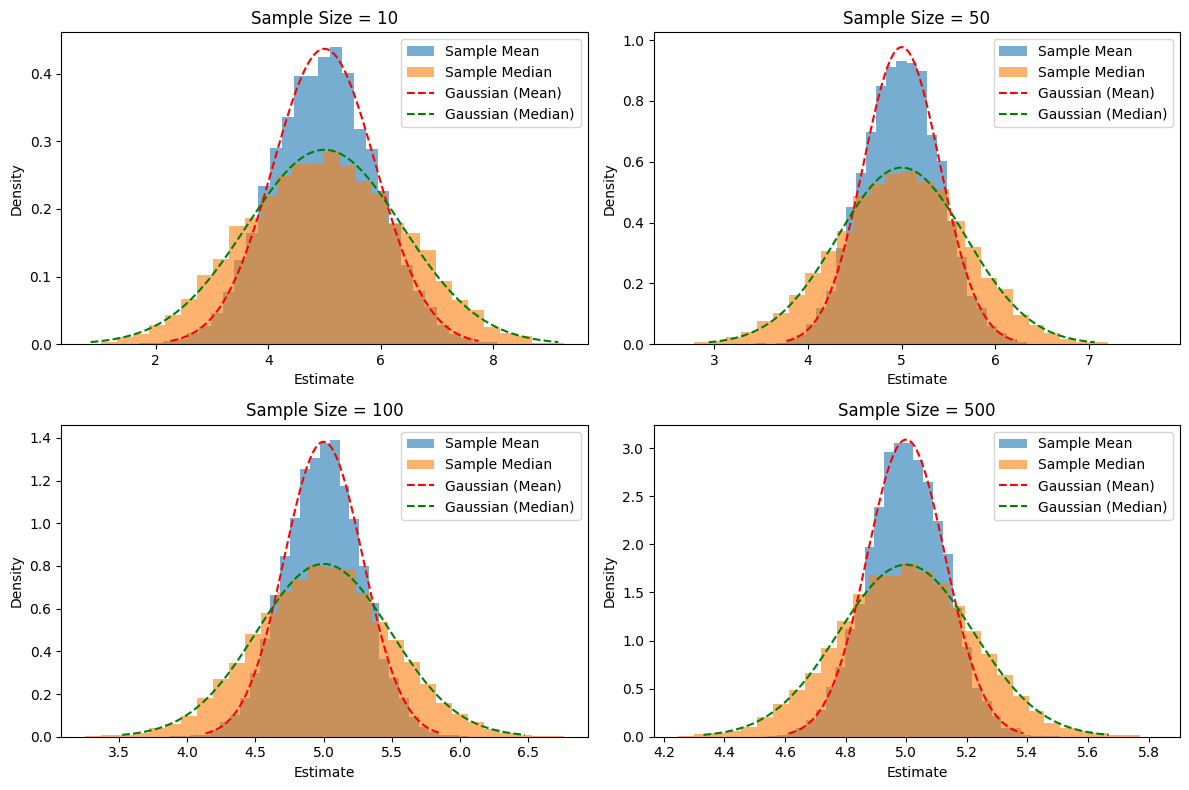

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Function to calculate theoretical standard deviation for sample average
def theoretical_std_dev_mean(theta, n):
    return np.sqrt((theta**2) / (3 * n))

# Function to calculate theoretical standard deviation for sample median
def theoretical_std_dev_median(theta, n):
    return np.sqrt((theta**2) / (n + 3))

# Parameters
theta = 5  # True value of theta
num_samples = 10000  # Number of samples to generate
sample_sizes = [10, 50, 100, 500]  # Different sample sizes

# Generate samples and calculate estimators
estimates_mean = {}
estimates_median = {}
for n in sample_sizes:
    samples = np.random.uniform(0, 2 * theta, size=(num_samples, n))
    sample_means = np.mean(samples, axis=1)
    sample_medians = np.median(samples, axis=1)
    estimates_mean[n] = sample_means
    estimates_median[n] = sample_medians

# Plot histograms and Gaussian distributions
plt.figure(figsize=(12, 8))

for i, n in enumerate(sample_sizes):
    plt.subplot(2, 2, i+1)
    plt.hist(estimates_mean[n], bins=30, density=True, alpha=0.6, label='Sample Mean')
    plt.hist(estimates_median[n], bins=30, density=True, alpha=0.6, label='Sample Median')
    
    # Plot Gaussian distributions
    x = np.linspace(theta - 3 * theoretical_std_dev_mean(theta, n), theta + 3 * theoretical_std_dev_mean(theta, n), 100)
    plt.plot(x, norm.pdf(x, loc=theta, scale=theoretical_std_dev_mean(theta, n)), 'r--', label='Gaussian (Mean)')
    
    x = np.linspace(theta - 3 * theoretical_std_dev_median(theta, n), theta + 3 * theoretical_std_dev_median(theta, n), 100)
    plt.plot(x, norm.pdf(x, loc=theta, scale=theoretical_std_dev_median(theta, n)), 'g--', label='Gaussian (Median)')
    
    plt.title(f'Sample Size = {n}')
    plt.xlabel('Estimate')
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()
